## Introduction
Data Analysis for Kaggle Google Job Skills and OpenDOSM Employment Population Ratio dataset is available in: https://www.kaggle.com/datasets/niyamatalmass/google-job-skills?resource=download & https://open.dosm.gov.my/data-catalogue/dosm-public-economy_labour-principalstats-monthly_7?range=QUARTERLY

Data description

Below are the description of the features/columns in the data:

### Dataset : Google Job Skills
<table>
    <tr>
    	<th>Data</th>
    	<th>Description</th>
    </tr>
    <tr>
        <td>Title: </td>
        <td>The title of the job</td>
    </tr>
    <tr>
        <td>Category: </td> 
        <td>Category of the job</td>
    </tr>
    <tr>
        <td>Location: </td> 
        <td>Location of the job</td>
    </tr>
    <tr>
        <td>Responsibilities: </td> 
        <td>Responsibilities for the job</td>
    </tr>
    <tr>
        <td>Minimum Qualifications: </td> 
        <td>Minimum Qualifications for the job</td>
    </tr>
    <tr>
        <td>Preferred Qualifications: </td> 
        <td>Preferred Qualifications for the job</td>
    </tr>
</table>

### Dataset : Unemployment

<table>
    <tr>
    	<th>Name</th>
        <th>Data</th>
    	<th>Description</th>
    </tr>
    <tr>
        <td>date (Date)</td>
        <td>Date</td>
        <td>The date in YYYY-MM-DD format</td>
    </tr>
    <tr>
        <td>lf_size (Integer)</td>
        <td>Labour Force Size</td>
        <td>Number of people</td>
    </tr> 
    <tr>
        <td>employed (Integer)</td>
        <td>Employed Persons</td>
        <td>Number of people</td>
    </tr> 
    <tr>
        <td>unemployed (Integer)</td>
        <td>Unemployed Persons</td>
        <td>Number of people</td>
    </tr> 
    <tr>
        <td>outside (Integer)</td>
        <td>Persons Outside Labour Force </td>
        <td>Number of people</td>
    </tr> 
    <tr>
        <td>p_rate (Float)</td>
        <td>Participation Rate</td>
        <td>Ratio of the labour force size to the working age population</td>
    </tr> 
    <tr>
        <td>ep_ratio (Float)</td>
        <td>Employment-Population Ratio</td>
        <td>Ratio of the labour force size to the population</td>
    </tr>
</table>

##  Import all required packages/libraries.

In [40]:
# import required packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import missingno
from collections import Counter
%matplotlib inline

import panel as pn
pn.extension('tabulator')
import panel.widgets as pnw
import hvplot.pandas
import holoviews as hv

pn.extension(sizing_mode='stretch_width')

import re
from collections import Counter
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords

# Install wordcloud in anaconda command prompt
from wordcloud import WordCloud, STOPWORDS


In [41]:
nltk.download("stopwords")
import matplotlib.pyplot as plt

# Lexicon-based sentiment analysis - install using pip install afinn in anaconda command prompt
from afinn import Afinn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Part 1 - Problem Analysis

## 1.1. Load the Unemployment Rate data into the dataframe.

In [42]:
# Load data into data frame using pandas package.
lpsm_df = pd.read_csv('labour-principalstats-monthly.csv')

#show all column name
print(lpsm_df.columns.values)

#display dataset info
lpsm_df.info()

#this dataset contain 21 columns and 155 rows

['date' 'lf_size' 'employed' 'unemployed' 'outside' 'u_rate' 'p_rate'
 'ep_ratio' 'lf_size_sa' 'employed_sa' 'unemployed_sa' 'u_rate_sa'
 'p_rate_sa' 'unemployed_15_24' 'u_rate_15_24' 'unemployed_15_30'
 'u_rate_15_30' 'employed_employer' 'employed_employee'
 'employed_ownaccount' 'employed_unpaidfamily']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   155 non-null    object 
 1   lf_size                155 non-null    float64
 2   employed               155 non-null    float64
 3   unemployed             155 non-null    float64
 4   outside                155 non-null    float64
 5   u_rate                 155 non-null    float64
 6   p_rate                 155 non-null    float64
 7   ep_ratio               155 non-null    float64
 8   lf_size_sa             155 non-null    float64
 9   employed_sa

In [43]:
# Calling the shape attribute of the dataset 
# in the data set
print ("Dataset shape: ", lpsm_df.shape)

Dataset shape:  (155, 21)


In [44]:
# Display the data.
lpsm_df

,date,lf_size,employed,unemployed,outside,u_rate,p_rate,ep_ratio,lf_size_sa,employed_sa,...,u_rate_sa,p_rate_sa,unemployed_15_24,u_rate_15_24,unemployed_15_30,u_rate_15_30,employed_employer,employed_employee,employed_ownaccount,employed_unpaidfamily
0,2010-01-01,12367891.0,11931152.0,436739.0,6927510.0,3.53,64.10,61.83,12368000.0,11959800.0,...,3.3,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-01,12059800.0,11632300.0,427400.0,7225100.0,3.54,62.53,60.32,12120100.0,11712800.0,...,3.3,62.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-01,12324200.0,11895900.0,428300.0,6993000.0,3.48,63.80,61.58,12242400.0,11817200.0,...,3.4,63.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-01,12512010.0,12133505.0,378505.0,6894505.0,3.03,64.47,62.52,12382100.0,12025300.0,...,3.0,63.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-01,12197600.0,11798900.0,398700.0,7186000.0,3.27,62.93,60.87,12197500.0,11790700.0,...,3.3,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2022-07-01,16599200.0,15978400.0,620700.0,7247900.0,3.70,69.60,67.00,16611000.0,15996500.0,...,3.6,69.7,336200.0,12.1,476500.0,7.4,545100.0,12144900.0,2787500.0,500900.0
151,2022-08-01,16629700.0,16017700.0,612000.0,7242000.0,3.70,69.70,67.10,16647200.0,16058000.0,...,3.6,69.7,337600.0,12.1,467500.0,7.1,546900.0,12167000.0,2804700.0,499100.0
152,2022-09-01,16657200.0,16052200.0,605000.0,7239200.0,3.60,69.70,67.20,16640100.0,16030100.0,...,3.7,69.7,339100.0,12.1,460400.0,7.1,548000.0,12182700.0,2823200.0,498200.0
153,2022-10-01,16683500.0,16081500.0,602000.0,7237300.0,3.60,69.70,67.20,16656800.0,16033700.0,...,3.7,69.6,337200.0,12.1,476900.0,7.4,552400.0,12200400.0,2833600.0,495200.0


In [45]:
#check all data for null value or empty cell
lpsm_df.isnull().any()

date                     False
lf_size                  False
employed                 False
unemployed               False
outside                  False
u_rate                   False
p_rate                   False
ep_ratio                 False
lf_size_sa               False
employed_sa              False
unemployed_sa            False
u_rate_sa                False
p_rate_sa                False
unemployed_15_24          True
u_rate_15_24              True
unemployed_15_30          True
u_rate_15_30              True
employed_employer         True
employed_employee         True
employed_ownaccount       True
employed_unpaidfamily     True
dtype: bool

In [46]:
#calculate null percentage
print('Percentage of null value : ', 
      np.round(100-(((len(lpsm_df['unemployed_15_24'])-
                      lpsm_df['unemployed_15_24'].isnull().sum())
                     /len(lpsm_df['unemployed_15_24'])))*100),2)

Percentage of null value :  46.0 2


<AxesSubplot:>

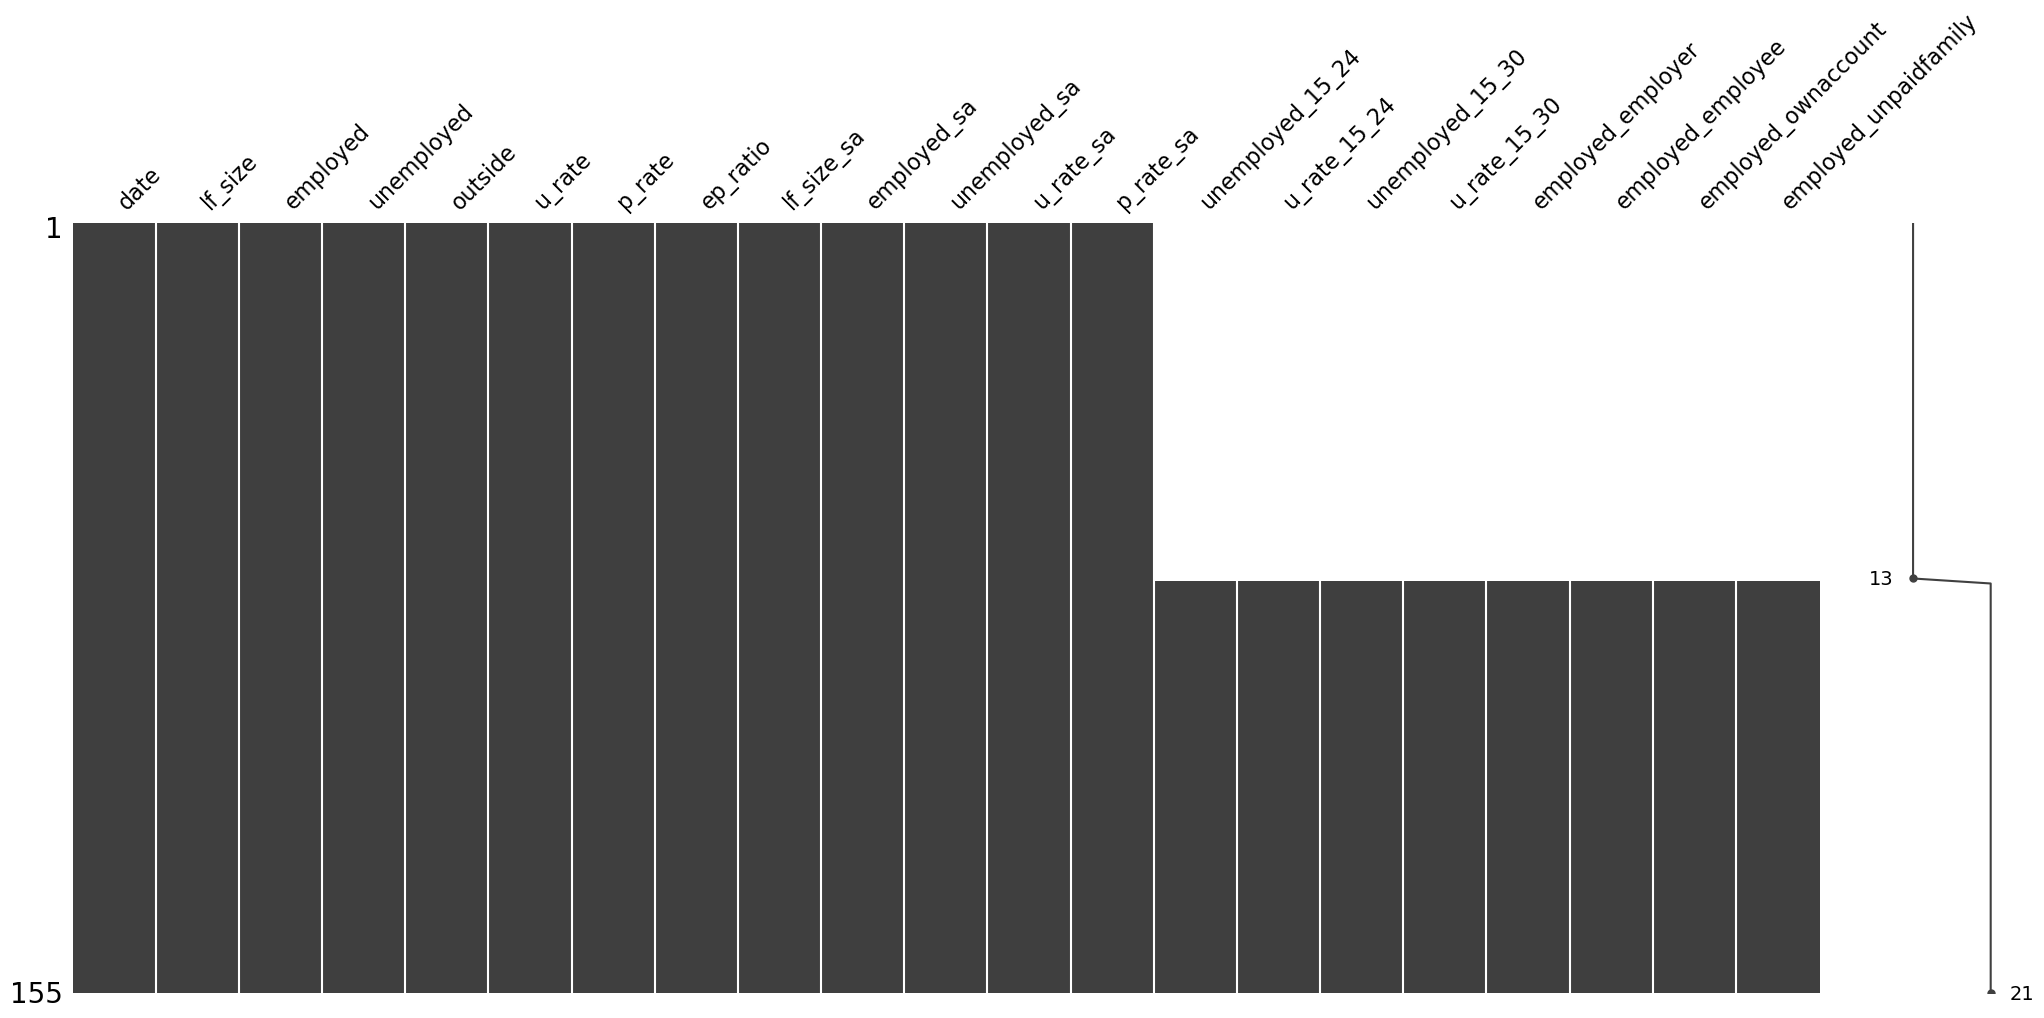

In [47]:
#display missing data in dataset using plot
missingno.matrix(lpsm_df)

### Analysis : 
There is an obvious empty cells occur in the last 8 columns. 
This is because the time series for 1982–2021 presented the principal labour force statistics. 
There is no data for 1991 and 1994 since LFS was not conducted in those years. Meanwhile, time series for 2016–2021 presented statistics on labour force participation rate (LFPR), labour force and employed persons by selected demographic and socioeconomic characteristics. The sum of each category may not always equal to the totals shown in related tables because of independent rounding to one decimal place. However, the differences are not obvious.

## 1.2 Exploratory Data Analysis (EDA)
Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

In [48]:
# Dropping unneeded column
lpsm_df = lpsm_df.drop(['unemployed_15_24', 'u_rate_15_24', 'unemployed_15_30', 
                        'u_rate_15_30', 'employed_employer', 'employed_employee', 
                        'employed_ownaccount', 'employed_unpaidfamily', 'lf_size_sa',
                        'employed_sa', 'unemployed_sa', 'u_rate_sa', 'p_rate_sa'], axis = 1)
lpsm_df.dropna(inplace = True)

# Remove spaces in columns and replace them with underscore 
lpsm_df.columns = lpsm_df.columns.str.replace(" ", "_")

# Set the name of the columns to all lowercase
lpsm_df.columns = map(str.lower, lpsm_df.columns)

# Recheck dropped columns
lpsm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        155 non-null    object 
 1   lf_size     155 non-null    float64
 2   employed    155 non-null    float64
 3   unemployed  155 non-null    float64
 4   outside     155 non-null    float64
 5   u_rate      155 non-null    float64
 6   p_rate      155 non-null    float64
 7   ep_ratio    155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.8+ KB


In [49]:
# Convert the date column to a datetime object
lpsm_df['date'] = pd.to_datetime(lpsm_df['date'])

# Extract the day, month, and year from the datetime object
lpsm_df['year'] = lpsm_df['date'].dt.year
lpsm_df['month'] = lpsm_df['date'].dt.month
lpsm_df['day'] = lpsm_df['date'].dt.day

print(lpsm_df)

fig_umep = px.bar(lpsm_df,x='year',y='u_rate',color='year',labels={'u_rate':'Unemployment Rate','year':'Year'})
fig_umep.show()

          date     lf_size    employed  unemployed    outside  u_rate  p_rate  \
0   2010-01-01  12367891.0  11931152.0    436739.0  6927510.0    3.53   64.10   
1   2010-02-01  12059800.0  11632300.0    427400.0  7225100.0    3.54   62.53   
2   2010-03-01  12324200.0  11895900.0    428300.0  6993000.0    3.48   63.80   
3   2010-04-01  12512010.0  12133505.0    378505.0  6894505.0    3.03   64.47   
4   2010-05-01  12197600.0  11798900.0    398700.0  7186000.0    3.27   62.93   
..         ...         ...         ...         ...        ...     ...     ...   
150 2022-07-01  16599200.0  15978400.0    620700.0  7247900.0    3.70   69.60   
151 2022-08-01  16629700.0  16017700.0    612000.0  7242000.0    3.70   69.70   
152 2022-09-01  16657200.0  16052200.0    605000.0  7239200.0    3.60   69.70   
153 2022-10-01  16683500.0  16081500.0    602000.0  7237300.0    3.60   69.70   
154 2022-11-01  16709400.0  16108600.0    600900.0  7235700.0    3.60   69.80   

     ep_ratio  year  month 

In [50]:
#list all year in the dataset
lpsm_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [51]:
#count all year available
lpsm_df['year'].nunique()

13

In [52]:
lpsm_df2 = lpsm_df.groupby('date')[['unemployed']].sum().reset_index()
lpsm_df2.sort_values(by='unemployed',ascending=False).style.background_gradient(subset=['unemployed'])

,date,unemployed
124,2020-05-01 00:00:00,826100.000000
132,2021-01-01 00:00:00,782500.000000
123,2020-04-01 00:00:00,778790.000000
138,2021-07-01 00:00:00,778200.000000
133,2021-02-01 00:00:00,777500.000000
125,2020-06-01 00:00:00,773247.000000
131,2020-12-01 00:00:00,772891.000000
137,2021-06-01 00:00:00,768700.000000
130,2020-11-01 00:00:00,764392.000000
134,2021-03-01 00:00:00,753200.000000


In [53]:
lpsm_df.columns


Index(['date', 'lf_size', 'employed', 'unemployed', 'outside', 'u_rate',
       'p_rate', 'ep_ratio', 'year', 'month', 'day'],
      dtype='object')

In [54]:
idf = lpsm_df.interactive()

# Part 2 - Solution Analysis

## 2.1 Load the Google Job Skills data into the dataframe.

In [55]:
# Load data into data frame using pandas package.
skill_df = pd.read_csv('job_skills.csv')
print(skill_df.columns.values)
skill_df.info()

#this dataset contain 7 columns and 1250 rows

['Company' 'Title' 'Category' 'Location' 'Responsibilities'
 'Minimum Qualifications' 'Preferred Qualifications']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1235 non-null   object
 5   Minimum Qualifications    1236 non-null   object
 6   Preferred Qualifications  1236 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [56]:
# Calling the shape attribute of the dataset 
# in the data set
print ("Dataset shape: ", skill_df.shape)

Dataset shape:  (1250, 7)


In [57]:
# Display the data.
skill_df

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...
...,...,...,...,...,...,...,...
1245,Google,Global Investigator,Real Estate & Workplace Services,"Boulder, CO, United States",Develop protocols and practices to assess and ...,BA/BS degree or equivalent practical experienc...,Investigative or Interview certification throu...
1246,Google,Campus Security Manager,Real Estate & Workplace Services,"Boulder, CO, United States",Manage the daily operations of the security ve...,BA/BS degree or equivalent practical experienc...,Master’s degree.\nProficient in the use of com...
1247,Google,Facilities Manager,Real Estate & Workplace Services,"Xinyi District, Taiwan",Collaborate with functional teams; plan and ma...,BA/BS degree or equivalent practical experienc...,Experience managing outsourced facilities serv...
1248,Google,Physical Security Manager,Real Estate & Workplace Services,"Tel Aviv-Yafo, Israel",Partner closely with and offer guidance and co...,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...


In [58]:
skill_df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,"Previous internship experience in Sales, Adver..."
freq,1227,35,168,190,33,32,32


## 2.2 Data Cleaning.


In [59]:
#check the null value or empty cell
skill_df.isnull().any()

#there is a column with empty cell

Company                     False
Title                       False
Category                    False
Location                    False
Responsibilities             True
Minimum Qualifications       True
Preferred Qualifications     True
dtype: bool

<AxesSubplot:>

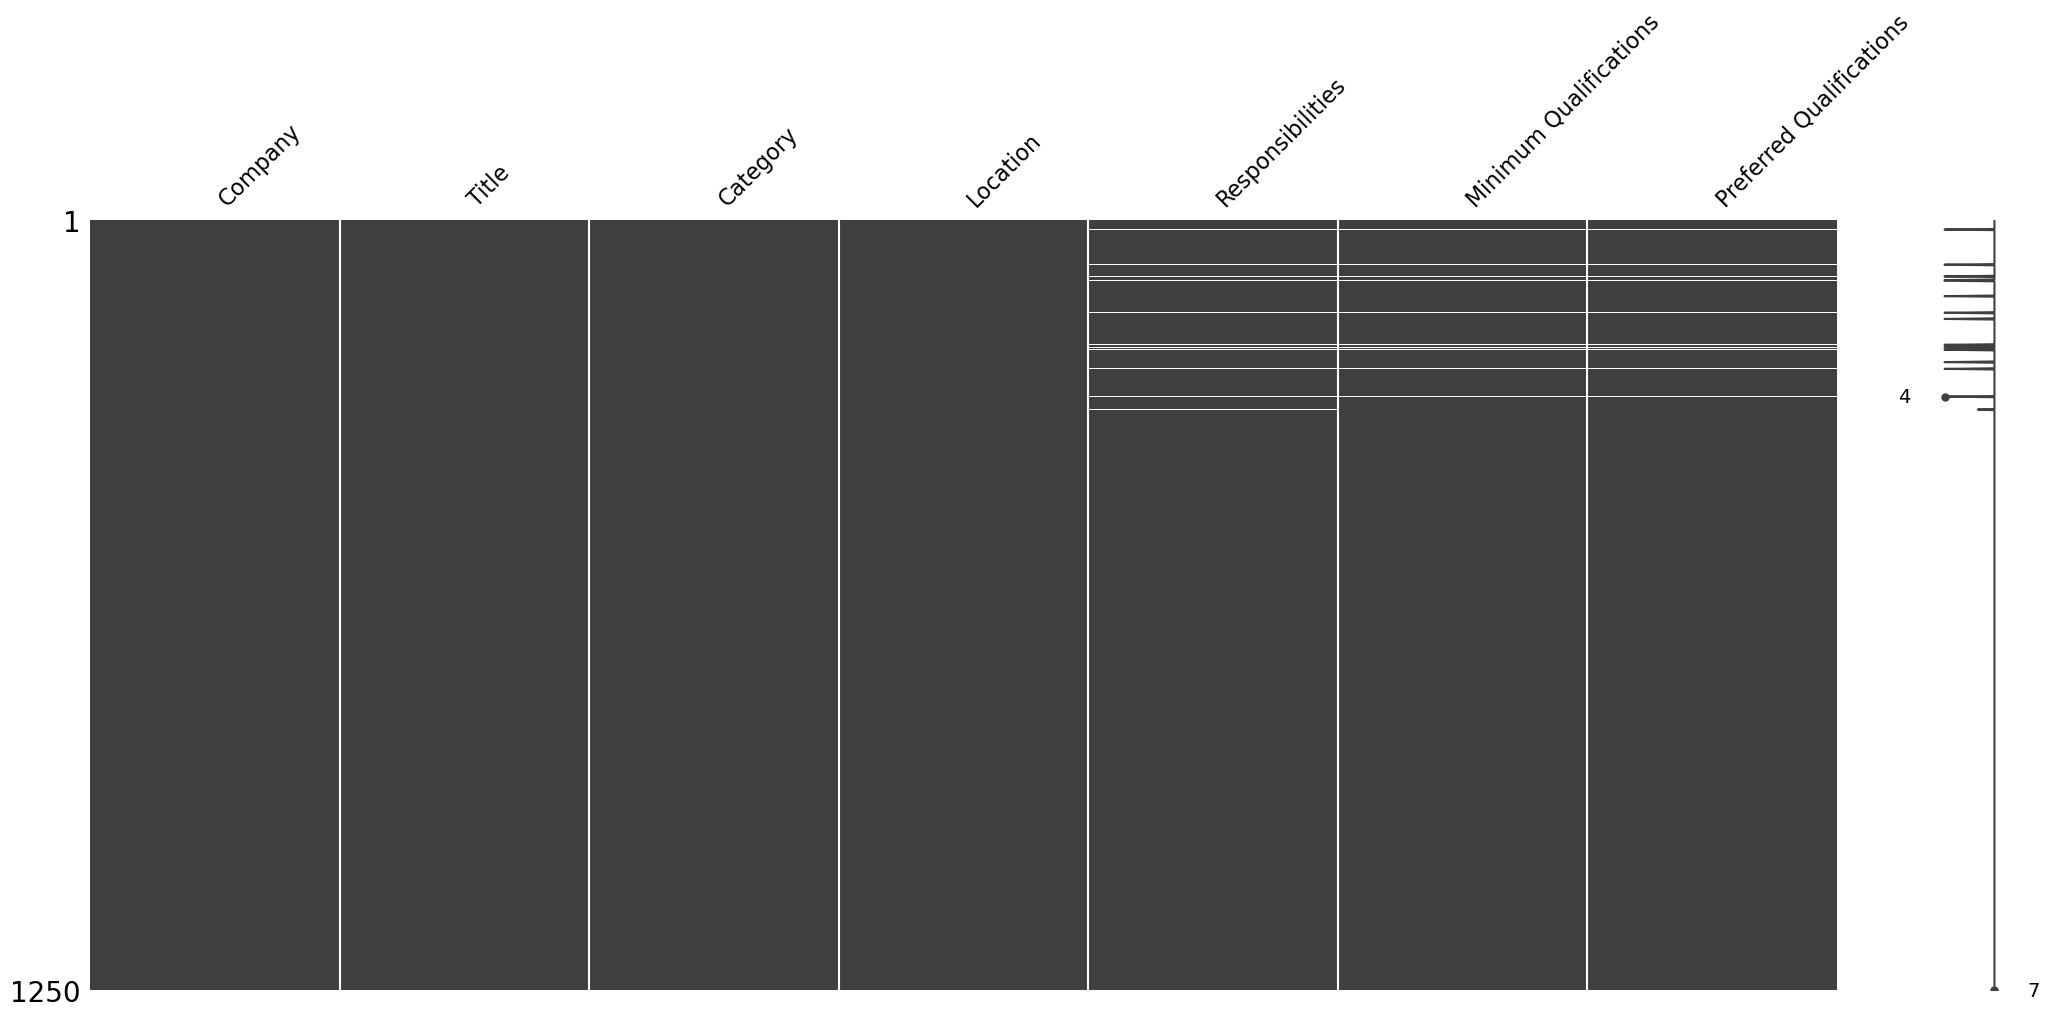

In [60]:
#visualize missing data in dataset
missingno.matrix(skill_df)

In [61]:
# Remove spaces in columns and replace them with underscore 
skill_df.columns = skill_df.columns.str.replace(" ", "_")

# Set the name of the columns to all lowercase
skill_df.columns = map(str.lower, skill_df.columns)

# Recheck dropped columns
skill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   company                   1250 non-null   object
 1   title                     1250 non-null   object
 2   category                  1250 non-null   object
 3   location                  1250 non-null   object
 4   responsibilities          1235 non-null   object
 5   minimum_qualifications    1236 non-null   object
 6   preferred_qualifications  1236 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


In [62]:
#check all row and column size
skill_df.shape

(1250, 7)

In [63]:
#list the category column
skill_df['category'].unique()

array(['Program Management', 'Manufacturing & Supply Chain',
       'Technical Solutions', 'Developer Relations',
       'Hardware Engineering', 'Partnerships',
       'Product & Customer Support', 'Software Engineering',
       'Data Center & Network', 'Business Strategy', 'Technical Writing',
       'Technical Infrastructure', 'IT & Data Management',
       'Marketing & Communications', 'Network Engineering',
       'Sales & Account Management', 'Sales Operations', 'Finance',
       'Legal & Government Relations', 'Administrative',
       'User Experience & Design', 'People Operations',
       'Real Estate & Workplace Services'], dtype=object)

In [64]:
#count category available in the column
skill_df['category'].nunique()

23

In [65]:
#check duplicate
skill_df.value_counts()

company  title                                                                              category                          location                          responsibilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [66]:
# Remove duplicate records
skill_df.drop_duplicates(inplace=True)

# Recheck again by counting the records. The previous duplicate should be removed.
skill_df.value_counts()

company  title                                                                                  category                      location                          responsibilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [67]:
#count the row and column after delete the duplicate data
print(skill_df.shape)

(1127, 7)


## 2.3 Data Visualization

In [68]:
#list the top 10 title mention in the title column
skill_df.title.value_counts().head(10)

Business Intern 2018                            33
Field Sales Representative, Google Cloud        17
Interaction Designer                            12
MBA Intern, Summer 2018                         10
User Experience Researcher                       9
MBA Intern 2018                                  7
BOLD Intern, Summer 2018                         7
User Experience Design Intern, Summer 2018       7
Partner Sales Engineer, Google Cloud             7
User Experience Research Intern, Summer 2018     6
Name: title, dtype: int64

In [69]:
#list the top 10 category available
skill_df['category'].value_counts().head(10)

Sales & Account Management      167
Marketing & Communications      154
Technical Solutions             101
Finance                          86
People Operations                85
User Experience & Design         84
Program Management               69
Business Strategy                65
Partnerships                     54
Legal & Government Relations     45
Name: category, dtype: int64

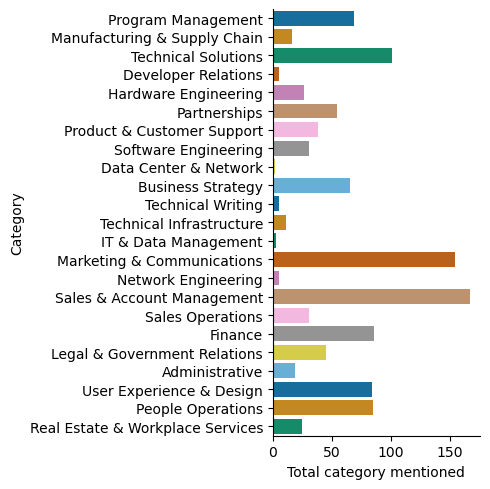

In [70]:
#display category available in plot
sns.catplot(y = "category", kind = "count", palette = "colorblind", data = skill_df)
plt.ylabel("Category")
plt.xlabel("Total category mentioned")
plt.show()

#this graph gives categorical numbers that they position

In [71]:
#display top 10 most job category
fig_cat = px.bar(skill_df['category'].value_counts().head(10).reset_index(),x='index',y='category',color='index',labels={'category':'Category Count','index':'Designation'})
fig_cat.update_layout(title_text='Top 10 Most Available Jobs', title_x=0.5)
fig_cat.show()

In [72]:
#display top 10 job location
fig_loc = px.bar(skill_df['location'].value_counts().head(10).reset_index(),x='index',y='location',color='index',labels={'location':'Location count','index':'Location'})
fig_loc.update_layout(title_text='Top 10 Jobs Location', title_x=0.5)
fig_loc.show()


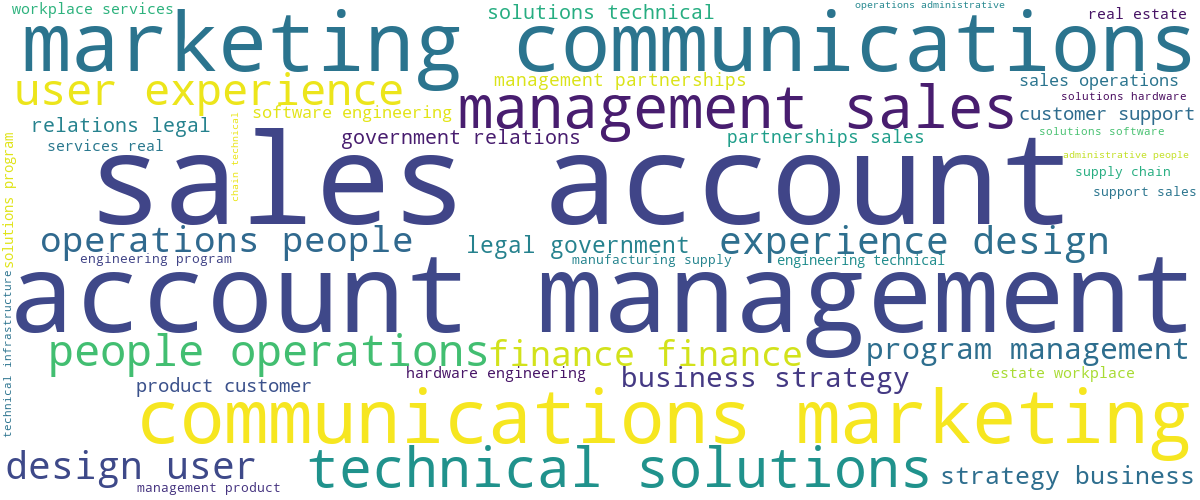

In [73]:
#display the most word mention in categories column
# Using the wordcloud library
df = skill_df

comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the csv file
for val in df["category"]:

    # Typecaste each val to string
    val = str(val)
    
    # Split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud_cat = WordCloud(width = 1200, height = 500, 
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

# Plot the WordCloud image                      
fig_word_cat = px.imshow(wordcloud_cat)
fig_word_cat.update_layout(title_text='Most Demand Job', title_x=0.5)
fig_word_cat.update_xaxes(visible=False)
fig_word_cat.update_yaxes(visible=False)
fig_word_cat.show()


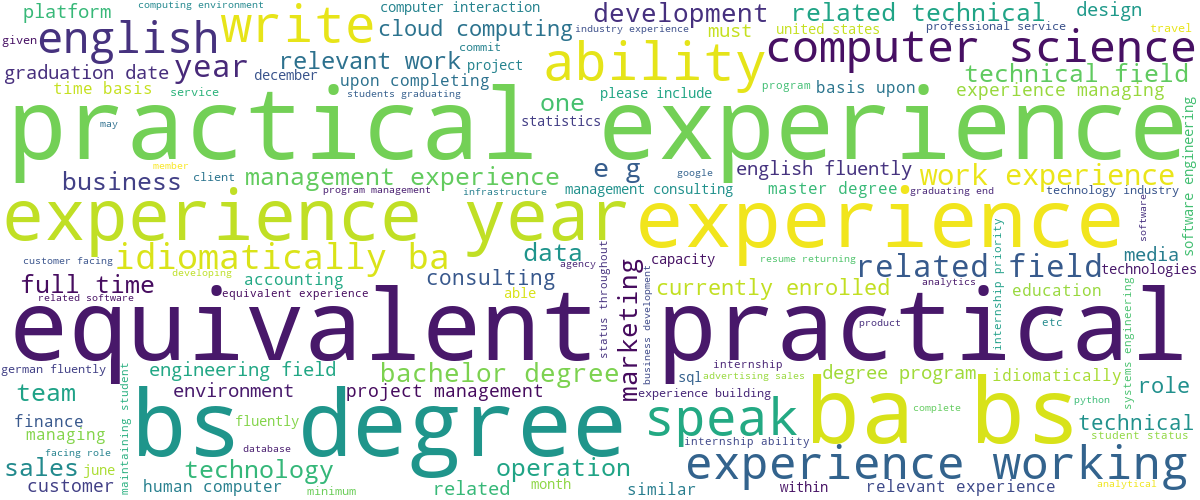

In [74]:
#display the most word mention in minimum_qualification column
# Using the wordcloud library
df = skill_df

comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the csv file
for val in df["minimum_qualifications"]:

    # Typecaste each val to string
    val = str(val)
    
    # Split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud_mq = WordCloud(width = 1200, height = 500, 
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

# Plot the WordCloud image                      
fig_word_mq = px.imshow(wordcloud_mq)
fig_word_mq.update_layout(title_text='Most demand Qualification', title_x=0.5)
fig_word_mq.update_xaxes(visible=False)
fig_word_mq.update_yaxes(visible=False)
fig_word_mq.show()


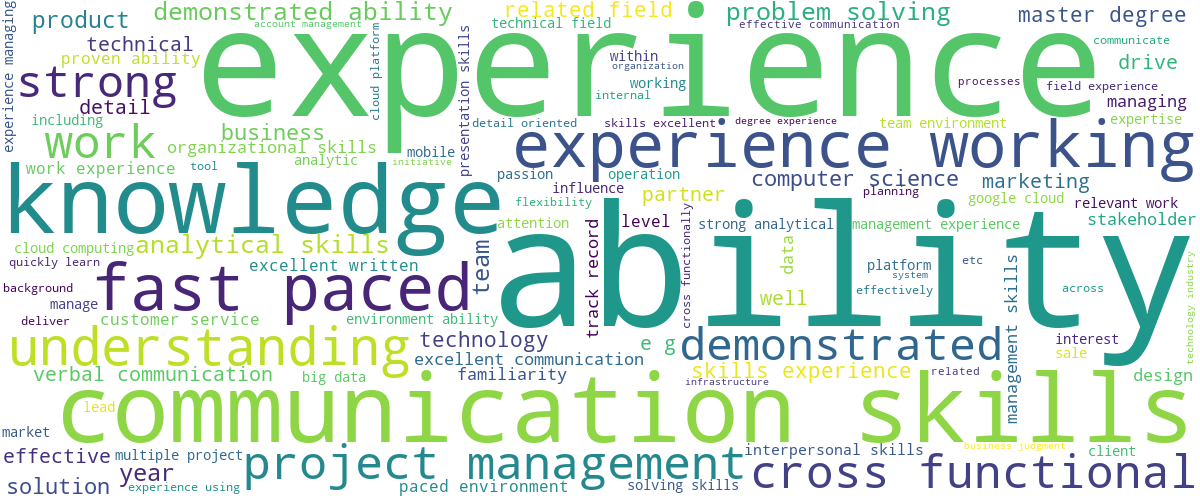

In [75]:
#display the most word mention in minimum_qualification column
# Using the wordcloud library
df = skill_df

comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the csv file
for val in df["preferred_qualifications"]:

    # Typecaste each val to string
    val = str(val)
    
    # Split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud_pq = WordCloud(width = 1200, height = 500, 
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

# Plot the WordCloud image                      
fig_word_pq = px.imshow(wordcloud_pq)
fig_word_pq.update_layout(title_text='Most Preferred Qualification', title_x=0.5)
fig_word_pq.update_xaxes(visible=False)
fig_word_pq.update_yaxes(visible=False)
fig_word_pq.show()


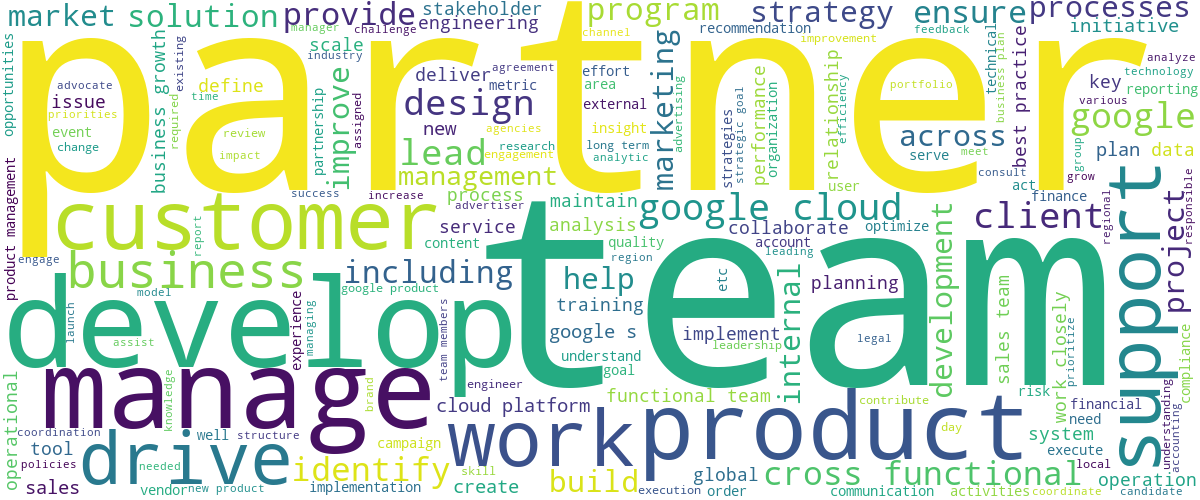

<Figure size 2000x1000 with 0 Axes>

In [76]:
#display the most word mention in responsibilities column
# Using the wordcloud library
df = skill_df

comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the csv file
for val in df["responsibilities"]:

    # Typecaste each val to string
    val = str(val)
    
    # Split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud_res = WordCloud(width = 1200, height = 500, 
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize=(20,10)) 
plt.tight_layout(pad=0)

# Plot the WordCloud image                      
fig_word_res = px.imshow(wordcloud_res)
fig_word_res.update_layout(title_text='Most Job Responsibilities Needed', title_x=0.5)
fig_word_res.update_xaxes(visible=False)
fig_word_res.update_yaxes(visible=False)
fig_word_res.show()

In [77]:
heading = "<h3>Unemployment Rate in Malaysia from 2010 to 2022</h3>"
text = pnw.StaticText(value=heading, align="center")
pn.pane.HTML(background='#f307eb', width=100, height=100)
#Layout using Template
template = pn.template.FastListTemplate(
    title='What Skill Needed To Get A Job?',
    main=[pn.Row(pn.Column(text, fig_umep)),
          pn.Row(pn.Column(fig_cat),pn.Column(fig_loc)),
          pn.Row(pn.Column(fig_word_res),pn.Column(fig_word_mq))],
    accent_base_color="#3E2F5B",
    header_background="#3E2F5B",
)


In [78]:
material = pn.template.MaterialTemplate(title='What Skill Needed To Get A Job?', header_background="#3E2F5B",
                                       site="Employment Skills", site_url="/unemployement skill")

xs = np.linspace(0, np.pi)
material.main.append(
    pn.Row(
        pn.Card((fig_umep), title='Unemployement Rate From 2010 to 2022')
    )
)
material.main.append(
    pn.Row(
        pn.Card((fig_loc), title='Job Location'),
        pn.Card((fig_cat), title='Job Category')
        
    )
)
material.main.append(
    pn.Row(
        pn.Card((fig_word_res), title='Responsibilities'),
        pn.Card((fig_word_mq), title='Minimum Qualification'),
        pn.Card((fig_word_pq), title='Preferred Qualification')
    )
)

material.show();
material.servable();

Launching server at http://localhost:53072
